In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
UF = input("Digite o UF: ")
Shape = input("Digite os 2 primeiros digitos do shapefile: ")

Digite o UF: BA
Digite os 2 primeiros digitos do shapefile: 29


# Importando o shapefile

In [17]:
gdf = gpd.read_file('Shapes/'+UF+'/'+Shape+'SEE250GC_SIR.shp')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 24139 entries, 0 to 24138
Data columns (total 14 columns):
ID            24139 non-null int64
CD_GEOCODI    24139 non-null object
TIPO          24139 non-null object
CD_GEOCODB    898 non-null object
NM_BAIRRO     898 non-null object
CD_GEOCODS    24139 non-null object
NM_SUBDIST    4161 non-null object
CD_GEOCODD    24139 non-null object
NM_DISTRIT    24139 non-null object
CD_GEOCODM    24139 non-null object
NM_MUNICIP    24139 non-null object
NM_MICRO      24139 non-null object
NM_MESO       24139 non-null object
geometry      24139 non-null object
dtypes: int64(1), object(13)
memory usage: 2.6+ MB


In [18]:
gdf.sort_values('CD_GEOCODI',inplace = True)

# Importando os resultados do universo

In [19]:
dados = pd.read_csv('Planilhas/'+UF+'/CSV/Basico_'+UF+'.csv',sep =';')

In [20]:
dados.rename(columns={'Cod_setor':'CD_GEOCODI'}, inplace=True)
dados.shape

(23782, 13)

In [21]:
dados.head()

,CD_GEOCODI,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,290010805000001,220.0,703.0,"3,2","2,04","658,94",2059568,"783,61","2353114,97","433,13","984885,48","654,56","1344341,37"
1,290010805000002,138.0,402.0,"2,91","2,08","860,93","1920981,89","900,06","1973474,79","530,12","951140,53","729,69","1164425,06"
2,290010805000003,244.0,696.0,"2,85","2,1","474,11","245601,61","635,63","226502,1","290,89","191435,6","573,27","215470,91"
3,290010805000004,191.0,591.0,"3,09","2,22","812,4","1558035,43","940,42","1683919,31","545,56","1143645,78","801,94","1476401,4"
4,290010805000005,94.0,294.0,"3,13","2,2","768,2","2450328,08","811,36","2554137,16","515,29","1799441,62","731,12","2398473,82"


# Fazendo um merge entre o geodataframe e o dataframe de dados do universo

In [22]:
gdf['CD_GEOCODI']= pd.to_numeric(gdf['CD_GEOCODI'])

In [23]:
df = pd.merge(gdf,dados, on='CD_GEOCODI')

In [24]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 23782 entries, 0 to 23781
Data columns (total 26 columns):
ID            23782 non-null int64
CD_GEOCODI    23782 non-null int64
TIPO          23782 non-null object
CD_GEOCODB    894 non-null object
NM_BAIRRO     894 non-null object
CD_GEOCODS    23782 non-null object
NM_SUBDIST    4108 non-null object
CD_GEOCODD    23782 non-null object
NM_DISTRIT    23782 non-null object
CD_GEOCODM    23782 non-null object
NM_MUNICIP    23782 non-null object
NM_MICRO      23782 non-null object
NM_MESO       23782 non-null object
geometry      23782 non-null object
V001          23772 non-null float64
V002          23772 non-null float64
V003          23772 non-null object
V004          23772 non-null object
V005          23772 non-null object
V006          23772 non-null object
V007          23749 non-null object
V008          23749 non-null object
V009          23782 non-null object
V010          23782 non-null object
V011          23768 non-

In [25]:
del gdf
del dados

Text(0.5,1,'BA')

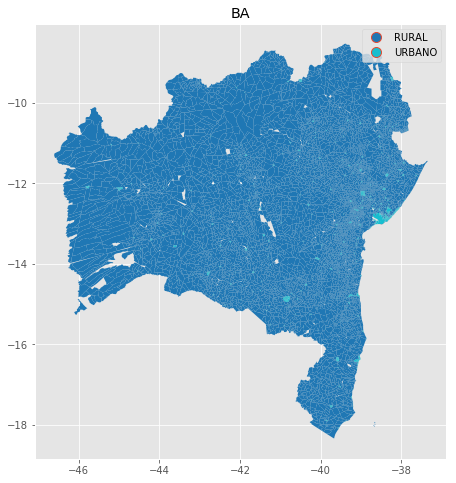

In [26]:
plt.style.use('ggplot')
df.plot(column = 'TIPO',figsize = (17,8),legend = True)
plt.title(UF)

# Utilizando a projeção de Albers para calcular as áreas

In [27]:
df['AREA'] = df.to_crs({'proj': 'aea'}).geometry.area/10**6

# Importando as regiões urbanas definidas pelo estudo da EMBRAPA em 2015

In [28]:
areas_urbanas_br_15 = gpd.read_file('Embrapa/areas_urbanas_br_15.shp')

In [29]:
areas_urbanas_br_15['Area'] = areas_urbanas_br_15.to_crs({'proj': 'aea'}).geometry.area/10**6

In [30]:
areas_urbanas_df_15 = areas_urbanas_br_15[areas_urbanas_br_15['UF']==UF]
del areas_urbanas_br_15

In [31]:
areas_urbanas_df_15.head()

,Municipio,UF,Area_Urb,Geocodigo,geometry,Area
3840,BrejolÃ¢ndia,BA,0.556,2904407.0,POLYGON ((-43.96098143028791 -12.4889942346862...,0.556366
3870,Ribeira do Amparo,BA,0.699,2926509.0,POLYGON ((-38.4347192835985 -11.04270911718599...,0.699384
3894,Rodelas,BA,1.290,2927101.0,"POLYGON ((-38.770222623077 -8.854090005431701,...",1.289898
4817,CanÃ¡polis,BA,1.525,2906105.0,POLYGON ((-44.20245337076218 -13.0619839348438...,1.525007
4898,Olindina,BA,3.366,2923100.0,POLYGON ((-38.33507177594274 -11.3713119632551...,3.365912


In [32]:
areas_urbanas_df_15.rename(columns={'Geocodigo':'CD_GEOCODM'}, inplace=True)
areas_urbanas_df_15['CD_GEOCODM']=areas_urbanas_df_15['CD_GEOCODM'].apply(lambda x: int(x))
areas_urbanas_df_15.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 417 entries, 3840 to 5357
Data columns (total 6 columns):
Municipio     417 non-null object
UF            417 non-null object
Area_Urb      417 non-null float64
CD_GEOCODM    417 non-null int64
geometry      417 non-null object
Area          417 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 22.8+ KB


In [33]:
df.fillna('0',inplace = True)

# Visualizando as distribuições de Moradias, Moradores e área 

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Nº de Moradias no BA')

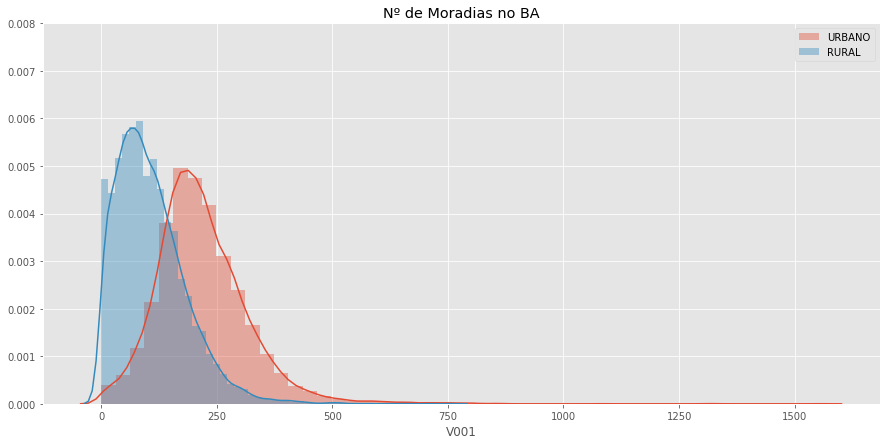

In [34]:
plt.style.use('ggplot')
df['V001'] = pd.to_numeric(df['V001'])
df['V002'] = pd.to_numeric(df['V002'])
fig = plt.figure(figsize = (15,7))
sns.distplot(df[df['TIPO'] =='URBANO']['V001'])
sns.distplot(df[df['TIPO']=='RURAL']['V001'])
plt.legend(['URBANO','RURAL'])
plt.ylim((0,0.008))
plt.title('Nº de Moradias no '+UF)

## Descrição do Número de Moradias por setor censitários urbanos e rurais

In [35]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V001'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V001'].describe())

RURAL 
 count    9861.000000
mean      107.422979
std        75.463582
min         0.000000
25%        52.000000
50%        94.000000
75%       149.000000
max       755.000000
Name: V001, dtype: float64
URBANO 
 count    13921.000000
mean       218.023633
std         99.692091
min          0.000000
25%        155.000000
50%        206.000000
75%        270.000000
max       1557.000000
Name: V001, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.05)

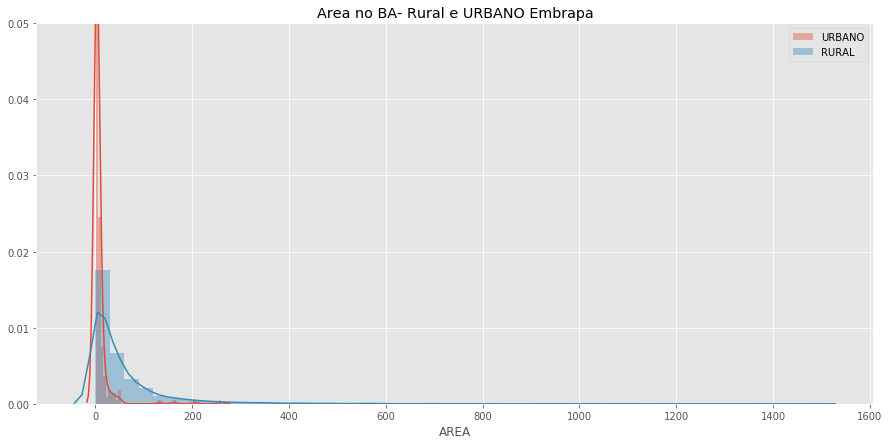

In [36]:
fig = plt.figure(figsize = (15,7))

sns.distplot(areas_urbanas_df_15['Area'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['AREA'])
plt.legend(['URBANO','RURAL'])
plt.title('Area no ' +UF+'- Rural e URBANO Embrapa')
plt.ylim((0,0.05))

In [37]:
df['Densidade Moradias'] = df.V001/df.AREA

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Densidade de moradias')

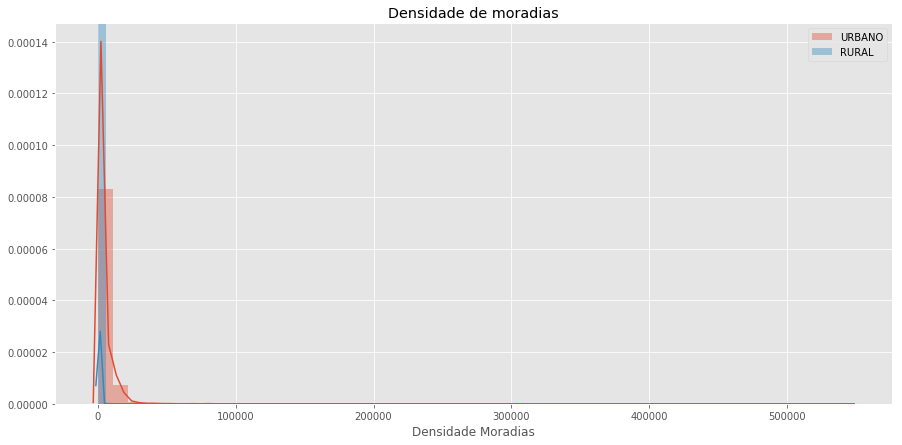

In [38]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['Densidade Moradias'])
sns.distplot(df[df['TIPO']=='RURAL']['Densidade Moradias'])
plt.legend(['URBANO','RURAL'])
plt.title('Densidade de moradias')
#plt.ylim((0,0.05))

In [39]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['Densidade Moradias'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['Densidade Moradias'].describe())

RURAL 
 count      9861.000000
mean        159.482438
std        3125.538497
min           0.000000
25%           1.162982
50%           3.306714
75%          22.051461
max      308265.128995
Name: Densidade Moradias, dtype: float64
URBANO 
 count     13921.000000
mean       3964.716874
std        7623.465643
min           0.000000
25%         607.295713
50%        1999.039485
75%        4777.740812
max      545373.440485
Name: Densidade Moradias, dtype: float64


In [40]:
df[(df['TIPO']=='RURAL')&(df['Densidade Moradias']>df['Densidade Moradias'].quantile(q=0.5))].describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,879.000000,8.790000e+02,879.000000,879.000000,879.000000,879.000000
mean,45701.893060,2.916873e+14,140.953356,497.282139,0.166099,1386.107457
std,6783.880317,9.537955e+11,82.336226,294.228941,0.113053,10390.237008
min,35003.000000,2.900108e+14,11.000000,42.000000,0.000256,480.287529
25%,39918.500000,2.908408e+14,76.000000,267.000000,0.083415,608.598855
50%,45146.000000,2.917003e+14,126.000000,430.000000,0.139413,815.502751
75%,50147.500000,2.925303e+14,190.000000,672.000000,0.219259,1139.652002
max,59123.000000,2.933604e+14,513.000000,1832.000000,0.808773,308265.128995


## Descrição da área por setor censitários urbanos e rurais

In [41]:
print('URBANO','\n',areas_urbanas_df_15['Area'].describe())
print('RURAL','\n',df[df['TIPO']=='RURAL']['AREA'].describe())

URBANO 
 count    417.000000
mean       6.858049
std       20.110608
min        0.310262
25%        1.535728
50%        2.711024
75%        4.981089
max      259.561619
Name: Area, dtype: float64
RURAL 
 count    9861.000000
mean       55.683615
std        91.308194
min         0.000256
25%         3.693357
50%        27.061872
75%        66.199521
max      1485.273783
Name: AREA, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.003)

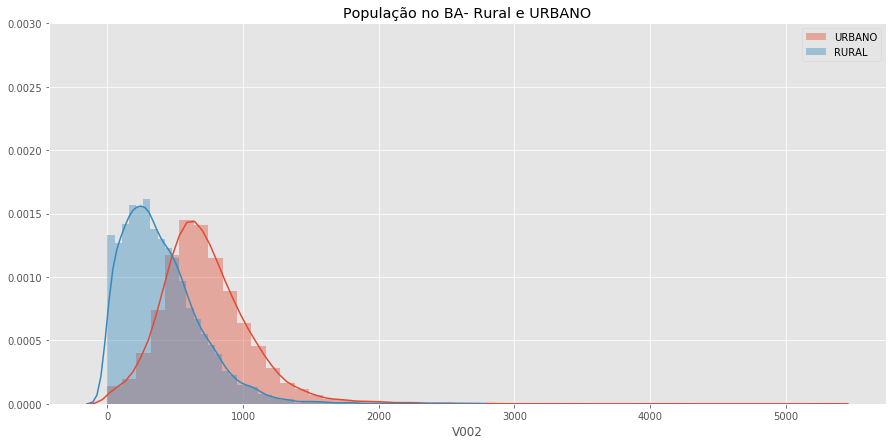

In [42]:
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['V002'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['V002'])
plt.legend(['URBANO','RURAL'])
plt.title('População no '+UF+'- Rural e URBANO')
plt.ylim((0,0.003))

## Descrição do Número de moradores por setor censitários urbanos e rurais

In [43]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V002'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V002'].describe())

RURAL 
 count    9861.000000
mean      395.268026
std       285.348314
min         0.000000
25%       184.000000
50%       344.000000
75%       549.000000
max      2646.000000
Name: V002, dtype: float64
URBANO 
 count    13921.000000
mean       723.075282
std        337.028773
min          0.000000
25%        506.000000
50%        683.000000
75%        894.000000
max       5308.000000
Name: V002, dtype: float64


# Definindo os limites para filtrar os setores censitários 

In [44]:
max_area = areas_urbanas_df_15['Area'].mean() 
min_pop =  df[df['TIPO']=='URBANO']['V002'].mean()
min_mor =  df[df['TIPO']=='URBANO']['V001'].mean()
min_densidade_moradias = df[df['TIPO']=='URBANO']['Densidade Moradias'].quantile(q = 0.5)

In [45]:
scrcu = df[(df.TIPO=='RURAL')&(df.V001 >= min_mor)&(df.AREA <= max_area)&(df.V002>= min_pop)\
           &(df['Densidade Moradias']>= min_densidade_moradias)]

In [46]:
scrcu.describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,18.000000,1.800000e+01,18.000000,18.000000,18.000000,18.000000
mean,44748.277778,2.915615e+14,302.777778,1046.722222,0.113088,3191.241024
std,6031.412202,8.439969e+11,81.645976,220.092442,0.053514,1724.747129
min,35731.000000,2.901601e+14,219.000000,789.000000,0.027124,2035.337692
25%,41099.000000,2.910555e+14,234.750000,846.000000,0.073267,2194.696028
50%,43753.500000,2.914455e+14,292.000000,1033.500000,0.110166,2669.876240
75%,46941.750000,2.919378e+14,322.000000,1181.000000,0.133735,3470.728252
max,57631.000000,2.931905e+14,493.000000,1540.000000,0.224154,9401.286411


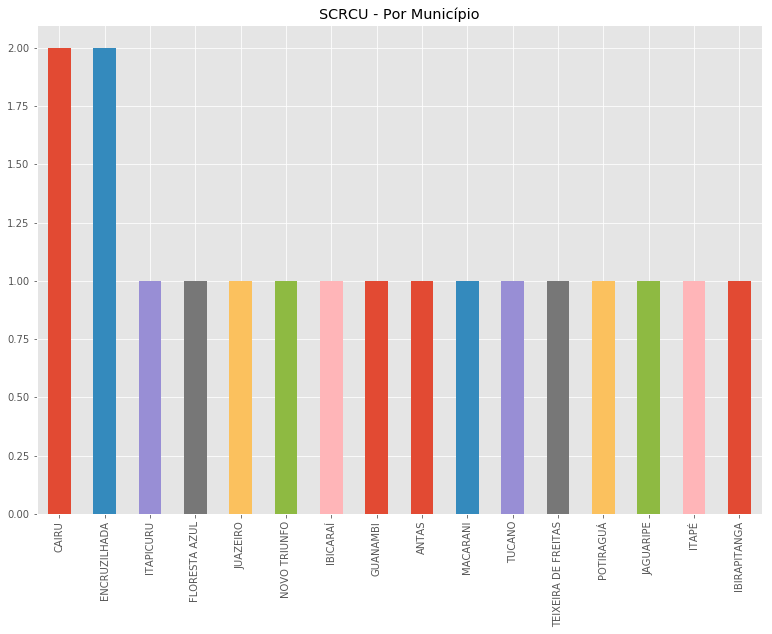

In [47]:
if scrcu['ID'].count()>0:
    plt.style.use('ggplot')
    scrcu.NM_MUNICIP.value_counts().plot.bar(figsize = (13,9))
    plt.title('SCRCU - Por Município')

# Visualizando as areas urbanas no estado - Sobrepondo scrcu e as regioes urbanas definidas pelo estudo da embrapa

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


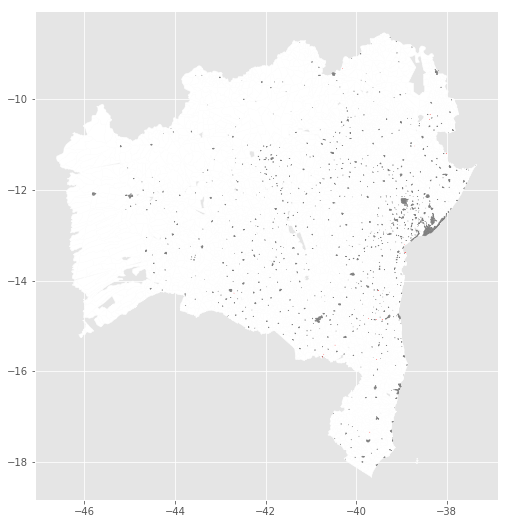

In [48]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,9))
ax.set_aspect('equal')
df.plot(ax=ax, color='white', edgecolor='white')
areas_urbanas_df_15.plot(ax=ax, color='gray', edgecolor='gray')
scrcu.plot(ax=ax,column = 'CD_GEOCODI',color = 'red',edgecolor='red')

In [49]:
areas_urbanas_df_15.rename(columns={'Area':'AREA'},inplace = True)

In [50]:
fonte = np.zeros(areas_urbanas_df_15.shape[0])
areas_urbanas_df_15['FONTE'] = fonte

In [51]:
fonte_1 = np.zeros(scrcu.shape[0])+1
scrcu['FONTE'] = fonte_1

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
regioes_urbanas_df = scrcu[['geometry','FONTE']].append(areas_urbanas_df_15[['geometry','FONTE']])

In [53]:
regioes_urbanas_df.head()

,geometry,FONTE
728,"POLYGON ((-38.3756926839999 -10.4395683399999,...",1.0
2685,"POLYGON ((-38.9184843508466 -13.3772943202266,...",1.0
2692,"POLYGON ((-38.9185302219699 -13.3780348159015,...",1.0
5673,"POLYGON ((-40.7154545949921 -15.6246263418758,...",1.0
5716,"POLYGON ((-40.7462698370999 -15.6847526683413,...",1.0


In [54]:
def fonte(x):
    if x == 0:
        return 'EMBRAPA'
    return 'ALAN'
regioes_urbanas_df['FONTE'] = regioes_urbanas_df['FONTE'].apply(fonte) 

In [55]:
regioes_urbanas_df.to_file(driver = 'ESRI Shapefile',filename ='regioes_urbanas_'+UF+'.shp')

In [56]:
import mplleaflet
f, ax = plt.subplots(1,figsize = (15,7))
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='ALAN'].plot(ax=ax,color = 'red',edgecolor='red')
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='EMBRAPA'].plot(ax=ax,color = 'purple',edgecolor='purple')

mplleaflet.display(fig=f,crs=regioes_urbanas_df.crs)